# Assignment: Exploratory Data Analysis
### `! git clone https://github.com/ds3001f25/eda_assignment.git`
### Do Q1, Q2, and Q3.

**Q1.** In class, we talked about how to compute the sample mean of a variable $X$,
$$
m(X) = \dfrac{1}{N} \sum_{i=1}^N x_i
$$
and sample covariance of two variables $X$ and $Y$,
$$
\text{cov}(X,Y) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y))).
$$
Recall, the sample variance of $X$ is
$$
s^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2.
$$
It can be very helpful to understand some basic properties of these statistics. If you want to write your calculations on a piece of paper, take a photo, and upload that to your GitHub repo, that's probably easiest.

1. Show that $m(a + bX) = a+b \times m(X)$.
2. Show that $\text{cov}(X,a+bY) = b \times \text{cov}(X,Y)$
3. Show that $\text{cov}(a+bX,a+bX) = b^2 \text{cov}(X,X) $, and in particular that $\text{cov}(X,X) = s^2 $.
4. Instead of the mean, consider the median. Consider transformations that are non-decreasing (if $x\ge x'$, then $g(x)\ge g(x')$), like $2+5 \times X$ or $\text{arcsinh}(X)$. Is a non-decreasing transformation of the median the median of the transformed variable? Explain. Does your answer apply to any quantile? The IQR? The range? 
5. Consider a non-decreasing transformation $g()$. Is is always true that $m(g(X))= g(m(X))$?

<img src="photos/question_1.1.jpg" width="400">
<img src="photos/question_1.2.jpg" width="400">
<img src="photos/question_1.3.jpg" width="500">

4. Yes, a non-decreasing transformation of the median remains the median for the transformed variable. Using the example example transformation 2 + 5 * X, where X = [1, 3, 5], we have an original median of 3. If we transform it to 2 + 5 * (3) = 17, when we transform the variable to [7, 17, 27], 17 remains our median. This works because the median is a measure of position within some variable. Thus, if we perform a non-decreasing transformation on an entire variable, all the values remain in the same position, preserving their order and thus the median.

    This statement still holds true for other quantiles besides the median (50th percentile) because all quantiles are a measure of position. No matter how complex the transformation, as long as it is non-decreasing, the order of our values will not change, so our transformed quantile does not change either.

    However, an IQR or range that has been non-decreasingly transformed will not equal the IQR or range of a transformed variable. This is because the IQR and range are measures of spread, not position. Take the example in code below. Our transformed variable's IQR does not match the original IQR put through the same transformation function.

In [1]:
import pandas as pd

data = {"Values": [1, 2, 3, 4]}
df = pd.DataFrame(data)

# compute original IQR
original_iqr = df["Values"].quantile(.75) - df["Values"].quantile(.25)

# transform the variable
df["Values"] = 2 + 5 * df["Values"]

# recompute the IQR
print("Transformed variable's IQR: ", df["Values"].quantile(.75) - df["Values"].quantile(.25))

# apply transformation to original IQR
print("Transformed IQR: ", 2 + 5 * original_iqr)


Transformed variable's IQR:  7.5
Transformed IQR:  9.5


5. For a non-decreasing transformation g(), it is not always true that the mean of g(X) equals g of the mean(x). This relationship only holds for linear, non-decreasing transformations. Because the mean, like the range or IQR, is not a positional measure, transformations that change the relationships between data points affect statistics such as the mean. For linear transformations, all values are affected equally and our mean remains the same. However, non-linear transformations (like squaring) disrupt these relationships and impact the sum of the values, which affects the mean. This can be proven with a simple example below:

In [2]:
data = {"Values": [1, 2, 3, 4]}
df = pd.DataFrame(data)

df["Linear_Values"] = df["Values"] + 5
df["Squared_Values"] = df["Values"] ** 2

original_mean = df["Values"].mean()

# statement holds for linear, non-decreasing transformations ONLY
print("Linear transformation variable mean: ", df["Linear_Values"].mean())
print("Linear transformed original mean: ", original_mean + 5)
print()
print("Square transformation variable mean: ", df["Squared_Values"].mean())
print("Square transformed original mean: ", original_mean ** 2)

Linear transformation variable mean:  7.5
Linear transformed original mean:  7.5

Square transformation variable mean:  7.5
Square transformed original mean:  6.25


**Q2.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. This provides a dataset of AirBnB rental properties for New York City.  
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?

2. The dataframe is 30478 x 13, so 30478 observations and 13 variables included. Each observation corresponds to an Airbnb listing, with the variables providing supplemental data on its host, location, ratings, layout, and price. 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df_airbnb = pd.read_csv('./data/airbnb_hw.csv')

print(df_airbnb.shape)

df_airbnb.head()

(30478, 13)


,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


3. When cross-tabulating these two variables, we can see that the most common listings are apartments with the entire unit being rented out. Private rooms in an apartment take a close second. Across all property types, however, shared rooms remain the least popular room type. Private rooms are more common than renting the entire property for bed & breakfasts, dorms, houses, huts, tents, treehouses, and other.

In [4]:
pd.crosstab(df_airbnb["Property Type"], df_airbnb["Room Type"])

Room Type,Entire home/apt,Private room,Shared room
Property Type,,,
Apartment,15669,10748,685
Bed & Breakfast,13,155,12
Boat,7,1,0
Bungalow,4,0,0
Cabin,1,1,0
Camper/RV,6,1,0
Castle,0,1,0
Chalet,0,1,0
Condominium,72,22,0


4. The data in these visualizations are quite poorly scaled, making it difficult to learn much about the dataset from an initial analysis. While the majority of rentals fall between $0-1000, the histogram is not granular enough to extract any further interpretation, and the same issue persists with the kernel density plot.

NaN prices:  0
count    30478.000000
mean       163.589737
std        197.785454
min         10.000000
25%         80.000000
50%        125.000000
75%        195.000000
max      10000.000000
Name: cleaned_price, dtype: float64


[Text(0.5, 1.0, 'Airbnb Listing Count by Price'),
 Text(0.5, 0, 'Price'),
 Text(0, 0.5, 'Count')]

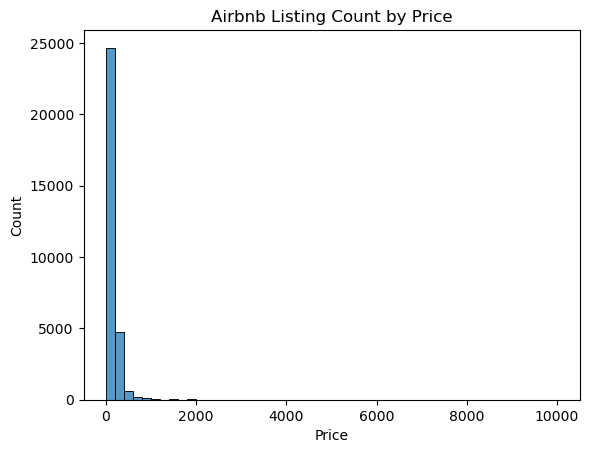

In [31]:
# clean "Price" variable
df_airbnb["cleaned_price"] = df_airbnb["Price"].str.replace(",", "")
df_airbnb["cleaned_price"] = pd.to_numeric(df_airbnb["cleaned_price"], errors="coerce")
df_airbnb_cleaned = df_airbnb[df_airbnb['cleaned_price'] > 0]

# no NaN values
print("NaN prices: ", df_airbnb_cleaned["cleaned_price"].isna().sum())

# statistical description
print(df_airbnb_cleaned["cleaned_price"].describe())

# histogram
fig = sns.histplot(df_airbnb_cleaned["cleaned_price"], bins=50)
fig.set(title='Airbnb Listing Count by Price',
xlabel='Price', 
ylabel='Count')

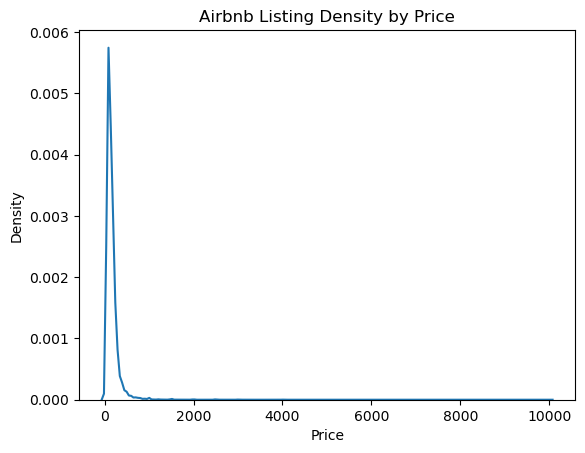

In [ ]:
# kernel density plot
fig = sns.kdeplot(df_airbnb_cleaned["cleaned_price"])
fig.set(title='Airbnb Listing Density by Price',
xlabel='Price', 
ylabel='Density')

[Text(0.5, 1.0, 'Boxplot of Airbnb Prices'), Text(0, 0.5, 'Price')]

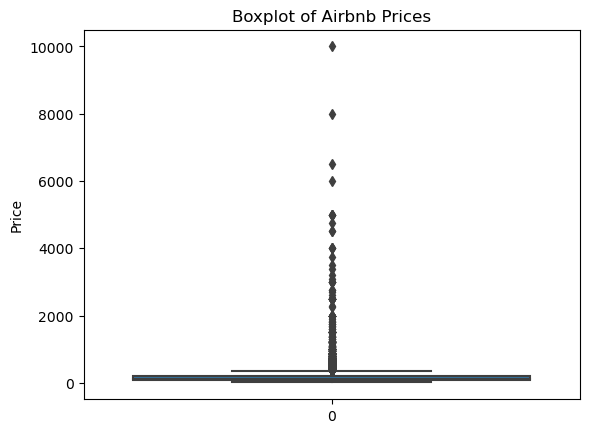

In [45]:
# box plot
fig = sns.boxplot(df_airbnb_cleaned["cleaned_price"])
fig.set(title='Boxplot of Airbnb Prices', 
ylabel='Price')

count    30478.000000
mean         4.860495
std          0.627704
min          2.302585
25%          4.382027
50%          4.828314
75%          5.273000
max          9.210340
Name: price_log, dtype: float64


[Text(0.5, 1.0, 'Airbnb Listing Count by Price'),
 Text(0.5, 0, 'Price'),
 Text(0, 0.5, 'Count')]

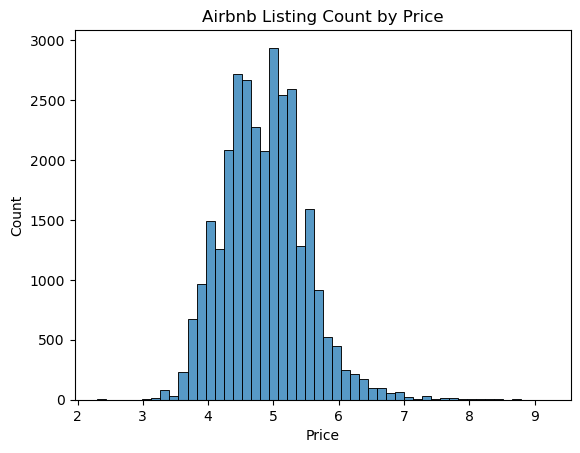

In [41]:
df_airbnb_cleaned["price_log"] = np.log(df_airbnb_cleaned["cleaned_price"])

# description
print(df_airbnb_cleaned["price_log"].describe())

# histogram
fig = sns.histplot(df_airbnb_cleaned["price_log"], bins=50)
fig.set(title='Airbnb Listing Count by Price',
xlabel='Price', 
ylabel='Count')

[Text(0.5, 1.0, 'Airbnb Listing Density by Price'),
 Text(0.5, 0, 'Price'),
 Text(0, 0.5, 'Density')]

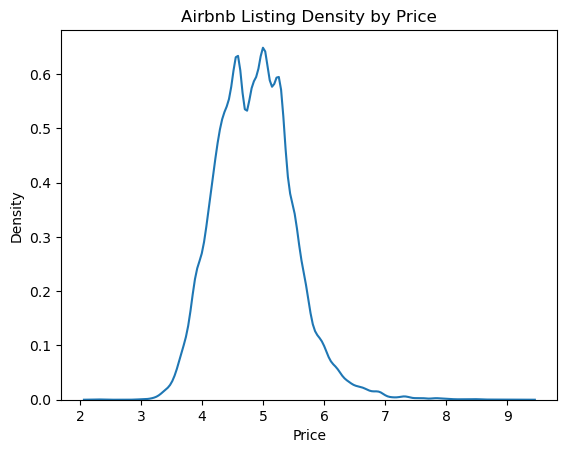

In [42]:
# kernel density plot
fig = sns.kdeplot(df_airbnb_cleaned["price_log"])
fig.set(title='Airbnb Listing Density by Price',
xlabel='Price', 
ylabel='Density')

[Text(0.5, 1.0, 'Boxplot of Airbnb Prices'), Text(0, 0.5, 'Price')]

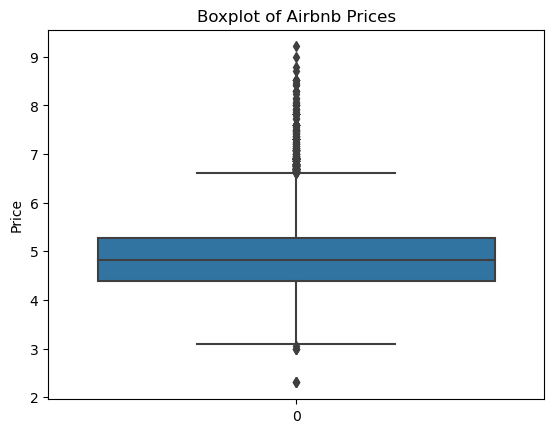

In [43]:
# box plot
fig = sns.boxplot(df_airbnb_cleaned["price_log"])
fig.set(title='Boxplot of Airbnb Prices', 
ylabel='Price')

**Q3.** This question looks at a time series of the number of active oil drilling rigs in the United States over time. The data comes from the Energy Information Agency.

1. Load `./data/drilling_rigs.csv` and examine the data. How many observations? How many variables? Are numeric variables correctly read in by Pandas, or will some variables have to be typecast/coerced? Explain clearly how these data need to be cleaned.
2. To convert the `Month` variable to an ordered datetime variable, use `df['time'] = pd.to_datetime(df['Month'], format='mixed')`.
3. Let's look at `Active Well Service Rig Count (Number of Rigs)`, which is the total number of rigs over time. Make a line plot of this time series. Describe what you see.
4. Instead of levels, we want to look at change over time. Compute the first difference of  `Active Well Service Rig Count (Number of Rigs)` and plot it over time. Describe what you see.
5. The first two columns are the number of onshore and offshore rigs, respectively. Melt these columns and plot the resulting series.